In [1]:
from corrts import *
import numpy as np

import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio

import matplotlib.pyplot as plt

pio.templates.default = "simple_white"

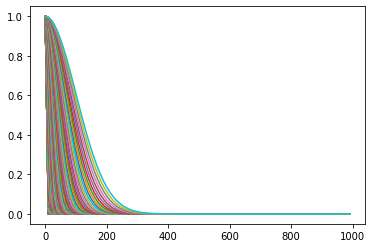

In [2]:
gaussian_kernel = lambda t,r: np.exp(-r*t**2/2) 

lags = np.arange(0,1000) 
rgs  = np.logspace(-4,0,100)[::-1]
acfs = gaussian_kernel(lags[:, None], rgs[None, :])

plt.plot(lags[::10], acfs[::10]);

In [32]:
1/2048**2


2.384185791015625e-07

In [56]:
ws = []
ap = []

nT = 100000
rs = np.logspace(-9,3, 256)
# rs = 1/np.sqrt(rs[::-1])

for r in rs: 
    a = np.exp(-r*(np.arange(0, nT))**2/2)
    ws.append(1 / ((a[0])**2 + 2 * np.sum(a[1:]**2)))
    ap.append(np.sqrt(r/(np.pi)))
fig = go.Figure()

fig = px.line(x=rs, y=[ws, ap], log_y=True, log_x=True)
fig.update_traces(showlegend=False, line_color='white')
fig.add_scatter(x=rs, y=ws, line_color='black', line_width=1, name='Autocorrelation-based')
fig.add_scatter(x=rs, y=ap, line_color=px.colors.qualitative.Safe[1], line_dash='dot', line_width=5, name='Asymptotic expression')
fig.update_xaxes(title_text=r"$\text{Second spectral moment }\rho''(0)$", tickfont_family='Computer Modern')#, title_standoff=0)#, range=(-.5,0.7))
fig.update_yaxes(title_text=r'$\text{Correction factor }(\nu/n)$', tickfont_family='Computer Modern', title_standoff=0, range=(np.log10(min(ap)), np.log10(max(ap))-0.3))
fig.update_layout(template='simple_white', height=400, width=500, legend=dict(title_text='',yanchor="top",y=0.99,xanchor="right",x=0.55), )

display(fig)


fig.write_image('./edf_ws_vs_asymptotic.pdf', scale=2)
fig.write_image('./edf_ws_vs_asymptotic.png', scale=2)